# ICA  
### Метод независимых компонент на Python  

http://tetraquark.ru/archives/311

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA

Генерирует два разных по форме сигнала с шумом, из которых создается две смеси, которые как бы воспринимают два микрофона

In [2]:
# Length of the sources signals
n_samples = 1024
time = np.linspace(0, 8, n_samples)

In [3]:
# Signal 1 : sinusoidal signal
signal_1 = np.sin(6 * time)  
# add noise to signal 1
signal_1 += 0.2 * np.random.normal(size=signal_1.shape) 
# Signal 2 : square signal
signal_2 = np.sign(np.sin(4 * time))
# add noise to signal 2
signal_2 += 0.2 * np.random.normal(size=signal_2.shape) 

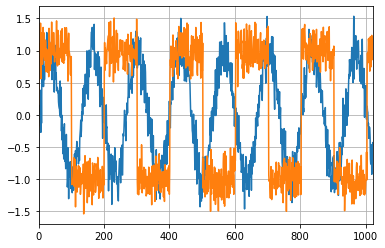

In [4]:
# Plot the sources signals
plt.figure()
plt.grid()
axes = plt.gca()
axes.set_xlim([0, n_samples])
plt.plot(signal_1)
plt.plot(signal_2)

In [5]:
# Create a mixtures from two sources
mix = []
mix.append(signal_1)
mix.append(signal_2)
mix = np.array(mix)
mix = np.dot(mix.T, np.array([[1, 2], [2, 1]]).T) #скалярное произведение двух массивов

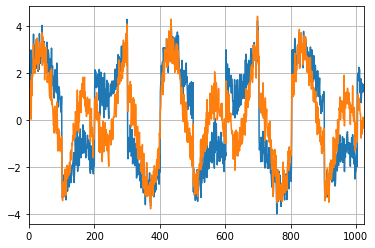

In [6]:
# Plot the mixtures signals
plt.figure()
plt.grid()
axes = plt.gca()
axes.set_xlim([0, n_samples])
plt.plot(mix)

In [7]:
# Create a FastICA object
ica = FastICA(n_components=2)
# Apply FastICA method and get the independent components matrix S_1
S_1 = ica.fit_transform(mix)
# Copy independent components matrix
S_2 = np.copy(S_1)

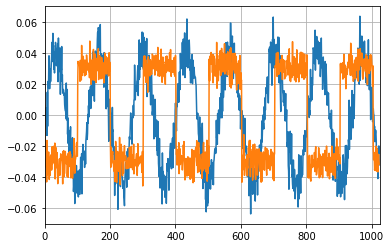

In [8]:
# Plot the independent components
# Plot the independent components
plt.figure()
plt.grid()
axes = plt.gca()
axes.set_xlim([0, n_samples])
plt.plot(S_1)

Обнуляем независимые компоненты сигнала 1 и сигнала 2

In [9]:
for i in range(len(S_1)):
    S_1[i][0] = 0
    S_2[i][1] = 0

Восстановить источники сигналов из матрицы независимых компонентов (X = S * A)  
- S - матрица независимых компонентов (matrix of independent components)  
- A - матрица смешения (mixing matrix)

In [10]:
restored_signal_1 = np.dot(S_1, ica.mixing_)
restored_signal_2 = np.dot(S_2, ica.mixing_)

Обнуляем значения сигнала 2 из массива сигнала 1 и наоборот

In [11]:
for i in range(len(restored_signal_1)):
    restored_signal_1[i][0] = 0
    restored_signal_2[i][1] = 0

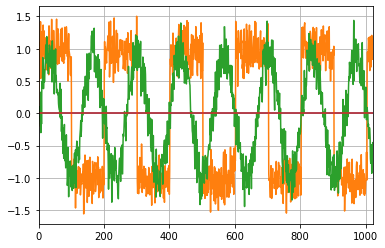

In [12]:
# Plot the restored signals
plt.figure()
plt.grid()
axes = plt.gca()
axes.set_xlim([0, n_samples])
plt.plot(restored_signal_1)
plt.plot(restored_signal_2)
plt.show()